In [1]:
#sri rama jayam

In [2]:
words=open('names.txt','r').read().splitlines()
words[:10]
# max(len(w) for w in words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
#bigram

#dictionary for counting
b={}

for w in words[:1]:
    chs=['<S>'] + list(w) + ['<E>'] 
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1 #get b[bigram] , but in case it is not in b , then return 0;
        # print(ch1,ch2)
        

In [4]:
b.items() #returns list of tuple with key-value pairs


dict_items([(('<S>', 'e'), 1), (('e', 'm'), 1), (('m', 'm'), 1), (('m', 'a'), 1), (('a', '<E>'), 1)])

In [5]:
print("sri rama jayam")
import torch

# a=torch.zeros((3,5),dtype=torch.int32)
# a
# a[1][3]=1
# a

sri rama jayam


In [6]:
x=sorted(list((set(''.join(words)))))
x

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
#we will now have a 2-D array and note which letters follow which letters generally

N=torch.zeros((27,27) , dtype=torch.int32)

chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
print(stoi)

for w in words:
    chs=['.'] + list(w) + ['.'] 
    for ch1,ch2 in zip(chs,chs[1:]):
        bigram=(ch1,ch2)
        b[bigram]=b.get(bigram,0)+1 #get b[bigram] , but in case it is not in b , then return 0;



{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [8]:
for w in words:
    chs=['.']+list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        N[ix1,ix2]+=1
print(N)

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

In [9]:
itos={i:s for s,i in stoi.items()}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

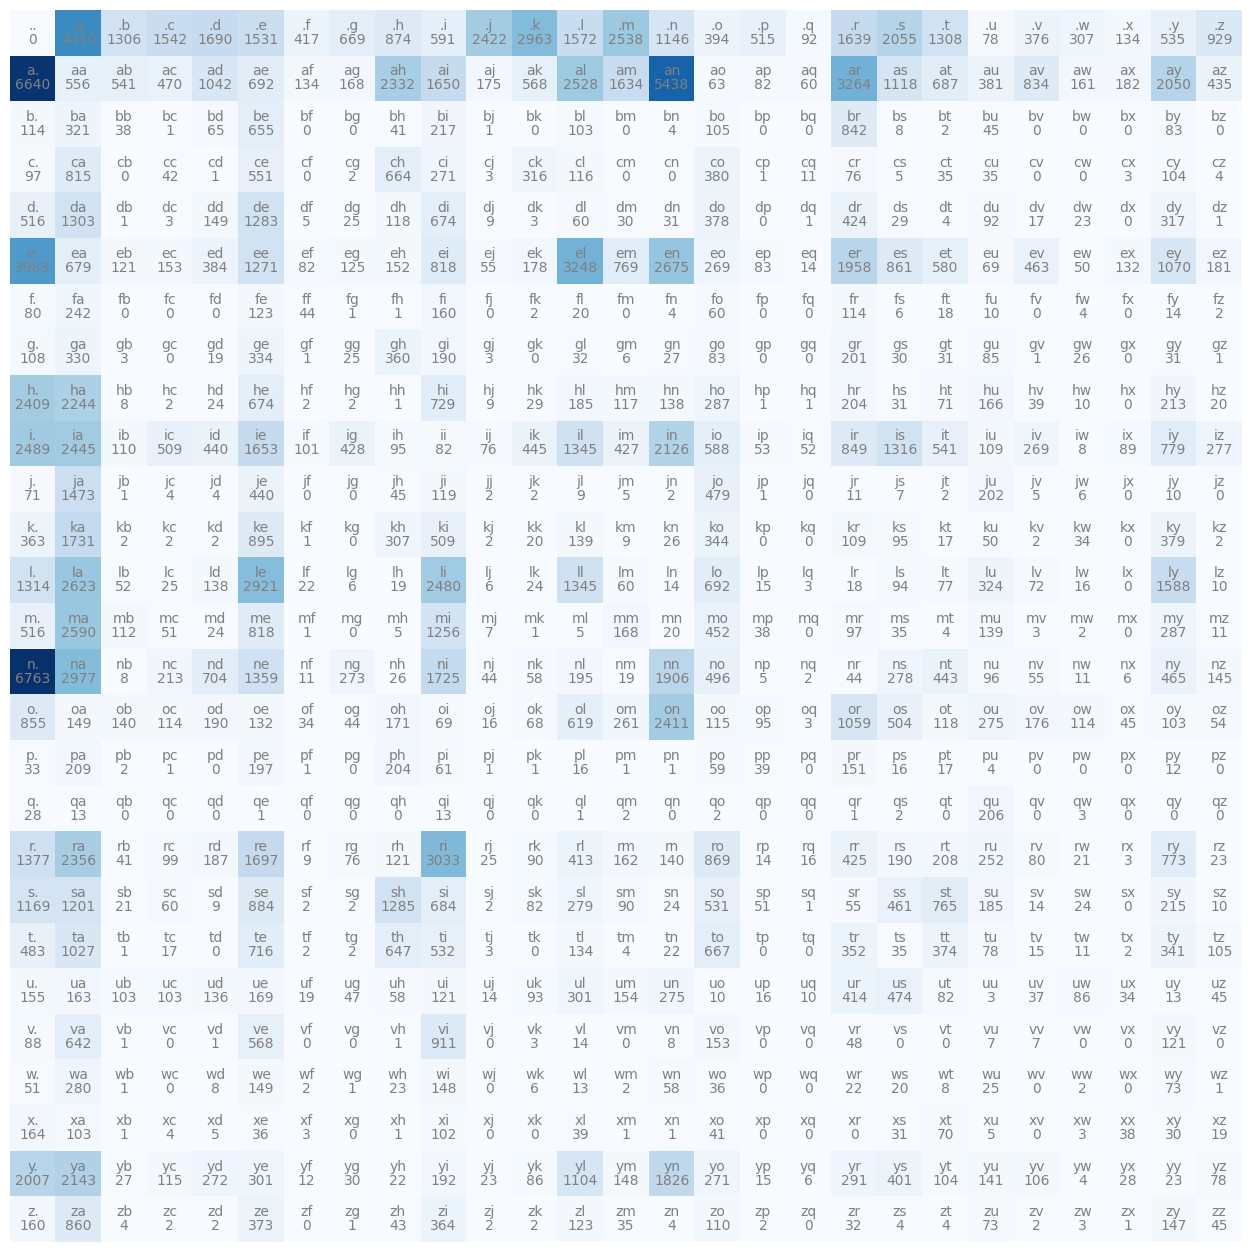

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N,cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr=itos[i]+itos[j]
        plt.text(j,i,chstr,ha="center",va="bottom",color="gray")
        plt.text(j,i,N[i,j].item(),ha="center",va="top",color='gray')#N[i,j] is a tensor , so we have to do the .item()
plt.axis("off")

torch.Multinomial basically samples a large value for the given probabilities. 
We use generator to make it deterministic , meaning , it gives same value all the time. 

In [11]:
p=N[0].float()
p=p/p.sum()

g=torch.Generator().manual_seed(214783647)
p
ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]

'k'

In [12]:
g=torch.Generator().manual_seed(214783647)
p=torch.rand(3,generator=g)
p/=p.sum()
print(p)


torch.multinomial(p,num_samples=20,replacement=True,generator=g)

tensor([0.1904, 0.5401, 0.2694])


tensor([2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0])

In [13]:
#P[0].sum()

we see that , even though the predictions are bad , they are better than the untrained model , i.e. p=[1,1,1,1,1,1,1....] : all have same priority . 

In [14]:
#writing a loop , finding a well-sampled element and finding the next ...

#P is a matrix which has the probabilitites. Basically the N matrix , but normalized so 
#that each row adds to 1. This is for efficiency.

P=(N+1).float() # 1 is added for model-smoothing 
P=P/P.sum(1,keepdim=True)

g=torch.Generator().manual_seed(214783647)

for i in range(20):
    out=[]
    ix=0
    while True:
        p=N[ix].float()
        p=p/p.sum()

        #p=torch.ones(27)/27.0
        
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        #print(itos[ix])
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))

kaa.
akyremilsandearvikyloria.
hte.
reckadevaiacadivi.
atayama.
a.
luloradan.
dror.
ancherwite.
drin.
konnilinninadrala.
m.
shri.
ka.
de.
avaxyle.
dyncovi.
enesman.
grran.
kah.


In [15]:
#print("started")
nll=0
for w in words:
    #print("hi")
    chs=['.']+list(w)+['.']
    log_likelihood=0.0
    n=0

    #print(chs)
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        prob=P[ix1,ix2]
        logprob=torch.log(prob)
        log_likelihood+=logprob
        nll+=logprob
        n+=1
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")
    print(f"log-likelihood for the word {w} is: {log_likelihood}")

    #if(log_likelihood>-5):
        #print("now high probability words: ")
        #print(f"log-likelihood for the word {w} is: {log_likelihood}")
#print("done")

#negative log likelihood:
nll=-log_likelihood
print(f"{nll/n}") # This is what we use as the loss function.

log-likelihood for the word emma is: -12.57164192199707
log-likelihood for the word olivia is: -17.52169418334961
log-likelihood for the word ava is: -8.715228080749512
log-likelihood for the word isabella is: -21.528545379638672
log-likelihood for the word sophia is: -17.48793601989746
log-likelihood for the word charlotte is: -25.304101943969727
log-likelihood for the word mia is: -7.815778732299805
log-likelihood for the word amelia is: -14.29293155670166
log-likelihood for the word harper is: -20.149938583374023
log-likelihood for the word evelyn is: -15.03903865814209
log-likelihood for the word abigail is: -22.087358474731445
log-likelihood for the word emily is: -14.327563285827637
log-likelihood for the word elizabeth is: -24.212692260742188
log-likelihood for the word mila is: -10.086380958557129
log-likelihood for the word ella is: -10.525310516357422
log-likelihood for the word avery is: -13.937993049621582
log-likelihood for the word sofia is: -16.267974853515625
log-likeli

log-likelihood for the word gabriella is: -22.223543167114258
log-likelihood for the word alice is: -13.356648445129395
log-likelihood for the word madelyn is: -15.114636421203613
log-likelihood for the word cora is: -10.601444244384766
log-likelihood for the word ruby is: -15.3508882522583
log-likelihood for the word eva is: -9.854517936706543
log-likelihood for the word serenity is: -21.59082794189453
log-likelihood for the word autumn is: -24.144739151000977
log-likelihood for the word adeline is: -16.8515682220459
log-likelihood for the word hailey is: -16.52727699279785
log-likelihood for the word gianna is: -15.717729568481445
log-likelihood for the word valentina is: -23.6783390045166
log-likelihood for the word isla is: -13.264334678649902
log-likelihood for the word eliana is: -13.86996078491211
log-likelihood for the word quinn is: -14.848410606384277
log-likelihood for the word nevaeh is: -21.055755615234375
log-likelihood for the word ivy is: -12.821131706237793
log-likelih

Now we go for neural network approach.
We did some sensible stuff and reached here.
My we dive into the DL phase.

In [16]:
#create the training set of all bigrams

xs,ys=[],[]

for w in words:
    chs=['.']+list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1=stoi[ch1]
        ix2=stoi[ch2]
        #print(ch1," ",ch2)
        xs.append(ix1)
        ys.append(ix2)
xs=torch.tensor(xs)
ys=torch.tensor(ys)

print(xs,ys)
num=len(ys)


tensor([ 0,  5, 13,  ..., 25, 26, 24]) tensor([ 5, 13, 13,  ..., 26, 24,  0])


Here , xs and ys are a tensor of numbers. 
But it is preferred to pass it on as one-hot-encoding
of the numbers. 
One-Hot-Encoding is making the nth number a 1 and all others 0. 
for eg:
5 will be represented as
[0 0 0 0 0 1] (0,1,2,3,4 and then 5)

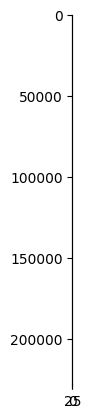

In [17]:
import torch.nn.functional as F
xenc=F.one_hot(xs,num_classes=27).float()
plt.imshow(xenc,cmap="Blues")
#xenc

In [18]:
#Constructing the first neuron. 
import numpy as np
W=torch.randn((27,27))
W
#Y=np.arange(27)
#plt.hist(W,bins=27,color="b",edgecolor="black")

#now we can multiply xenc with w
logits=xenc @ W #calculates wx for all 5 inputs in parallel
#each of the element(i,j) tells weight of j-th neuron for the i-th input 
#is it j+1 th neuron and i+1 th input?
#basically , what happens is wx is happening due to the matrix multiplication. 
#Now , each row of the output contains the particular output for the particular input
#i.e. 1st input corresponds to the first output. Now we should give semantic meaning to 
#each of the 27 numbers that are outputted. We would like it to be 
#probabilities of the next letter.

#we believe the numbers now are log(count)
counts=logits.exp() #equivalent to the N matrix.
probs=counts/counts.sum(1,keepdims=True)
probs


tensor([[0.0189, 0.0210, 0.0166,  ..., 0.0315, 0.0173, 0.0232],
        [0.0029, 0.0150, 0.0570,  ..., 0.0258, 0.0372, 0.0174],
        [0.1136, 0.0362, 0.0039,  ..., 0.0226, 0.0199, 0.0170],
        ...,
        [0.0151, 0.0204, 0.0045,  ..., 0.0287, 0.0123, 0.0141],
        [0.0365, 0.0802, 0.0453,  ..., 0.0133, 0.0101, 0.0668],
        [0.0334, 0.0067, 0.0322,  ..., 0.0333, 0.0152, 0.0114]])

In [19]:
g=torch.Generator().manual_seed(2147836470)
W=torch.randn((27,27),generator=g,requires_grad=True)

In [20]:
#forward pass

# xenc=F.one_hot(xs,num_classes=27).float()
# logits=xenc @ W
# counts=logits.exp()
# probs=counts/counts.sum(1,keepdims=True)

# loss=-probs[torch.arange(5),ys].log().mean()
# print(loss)


In [21]:

#backward pass

# W.grad=None # set gradient to 0
# loss.backward()
# W.data+=-0.1 * W.grad

#print(loss)
#print("done")

In [22]:
# gradient descent

for k in range(100):

    #forward pass
    xenc=F.one_hot(xs,num_classes=27).float()
    logits=xenc @ W
    counts=logits.exp()
    probs=counts/counts.sum(1,keepdims=True)
    loss=-probs[torch.arange(num),ys].log().mean()+0.01 * (W**2).mean()
    #print(loss.item())

    #backward pass
    W.grad=None # set gradient to 0
    loss.backward()
    W.data+=-1 * W.grad
    print(loss)
# print(loss)
W.data
    




    

tensor(3.7838, grad_fn=<AddBackward0>)
tensor(3.7753, grad_fn=<AddBackward0>)
tensor(3.7669, grad_fn=<AddBackward0>)
tensor(3.7586, grad_fn=<AddBackward0>)
tensor(3.7503, grad_fn=<AddBackward0>)
tensor(3.7421, grad_fn=<AddBackward0>)
tensor(3.7340, grad_fn=<AddBackward0>)
tensor(3.7259, grad_fn=<AddBackward0>)
tensor(3.7179, grad_fn=<AddBackward0>)
tensor(3.7099, grad_fn=<AddBackward0>)
tensor(3.7020, grad_fn=<AddBackward0>)
tensor(3.6942, grad_fn=<AddBackward0>)
tensor(3.6864, grad_fn=<AddBackward0>)
tensor(3.6787, grad_fn=<AddBackward0>)
tensor(3.6710, grad_fn=<AddBackward0>)
tensor(3.6634, grad_fn=<AddBackward0>)
tensor(3.6559, grad_fn=<AddBackward0>)
tensor(3.6484, grad_fn=<AddBackward0>)
tensor(3.6409, grad_fn=<AddBackward0>)
tensor(3.6335, grad_fn=<AddBackward0>)
tensor(3.6262, grad_fn=<AddBackward0>)
tensor(3.6190, grad_fn=<AddBackward0>)
tensor(3.6117, grad_fn=<AddBackward0>)
tensor(3.6046, grad_fn=<AddBackward0>)
tensor(3.5975, grad_fn=<AddBackward0>)
tensor(3.5904, grad_fn=<A

tensor([[ 1.2145e-01,  1.2956e+00,  2.9731e-01, -1.1227e-01,  5.5397e-01,
         -4.5014e-01,  5.8429e-01,  3.5327e-02, -1.2323e+00,  5.1956e-01,
          6.5610e-01,  7.8259e-01, -5.1849e-02,  1.1896e+00, -4.2119e-01,
         -8.7818e-02, -5.9419e-01, -1.0826e+00,  2.1251e-01,  7.2881e-02,
          8.3041e-01,  2.9177e-01, -6.5666e-01, -2.7031e-01,  2.1827e-01,
          2.9915e-01, -7.8403e-02],
        [ 1.3994e+00,  3.3887e-02, -7.9584e-01, -2.2463e-01,  6.0495e-01,
          6.2692e-01, -1.9865e-01, -8.0513e-01,  9.8059e-01,  4.4063e-01,
         -1.0865e+00, -4.1401e-01,  5.1098e-01,  5.5246e-01,  6.5398e-01,
         -4.5380e-01, -7.8304e-02,  3.0002e-01, -1.2791e+00, -1.0107e-01,
         -8.4759e-01,  8.2754e-02,  1.1314e-01, -7.2836e-01, -1.4480e-01,
          2.6516e-02, -1.7313e+00],
        [-1.1149e+00, -1.5454e-02,  6.1526e-01,  7.9585e-01, -6.3818e-01,
          2.6097e-01, -1.0662e+00, -1.0308e+00, -8.7722e-01,  2.6521e-01,
         -8.5680e-01, -1.3558e+00,  5.55

In [23]:
#sampling

g=torch.Generator().manual_seed(214783647)

for i in range(20):
    out=[]
    ix=0
    while True:

        xenc=F.one_hot(torch.tensor([ix]),num_classes=27).float()
        logits=xenc @ W
        counts=logits.exp()
        p=counts/counts.sum(1,keepdims=True)
        
        ix=torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        #print(itos[ix])
        out.append(itos[ix])
        if ix==0:
            break
    print(''.join(out))


kga.
fpkrsmcusbvdewrclkyxovgi.
htn.
rqkjedkvwigcmdxvwrakadrma.
acluxn.
mdkola.
kr.
wjctdrwntkqdrzbxnvnnupinnupbdfhlupinubyr.
kkfdetdrqxufdcdyncdexuwnvsmgevgvzassgvhuxriptiniuwrzmtssqnkftdeelvmymesbbr.
fbuxnqsiyqbddbraewratfdftflftptkn.
fyoxrnnnovzfvyxqepd.
myqkawyzhenltcue.
dmasehjybxn.
zramggglkitagglcxngdlcqvge.
mgmlgsscyjhbzbcz.
lpdrdytfritzemttneeuxngdecbqhwgljelszubecn.
avxrwyrryrzsra.
clphlyhyyezgvgofyuwzwpewyumzsrxnktsaelaiptfvclyuxdckinrirei.
xqtcyinmssaixt.
awylvggsjeah.
